<a href="https://colab.research.google.com/github/zhixin9001/2022-Python/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import csv
csv_1='/content/drive/MyDrive/PythonLearn/lottery/3.csv'

red_avg_total=(1+35)*5/2
blue_avg_total=(1+12)*2/2
print(f'red_avg_total:{red_avg_total}')
print(f'blue_avg_total:{blue_avg_total}')
with open(csv_1) as f:
  csv_reader=csv.reader(f)
  print(next(csv_reader))
  counter=1
  reds,blues,red_blues=[],[],[]
  while counter<=600:
    row=next(csv_reader)
    splited=row[2].split()
    red_blues.append(list(map(int,splited)))
    reds.append(list(map(int,splited[:-2])))
    blues.append(list(map(int,splited[-2:])))

    counter+=1
# reds=[[4,12,17,29,35],[4,11,12,17,31],[3,16,19,29,34],[7,21,22,32,34],[7,8,21,29,35]]

red_avg_total:90.0
blue_avg_total:13.0
['num', 'time', 'result', 'l1', 'l1x', 'l2', 'l2x', 'l3']


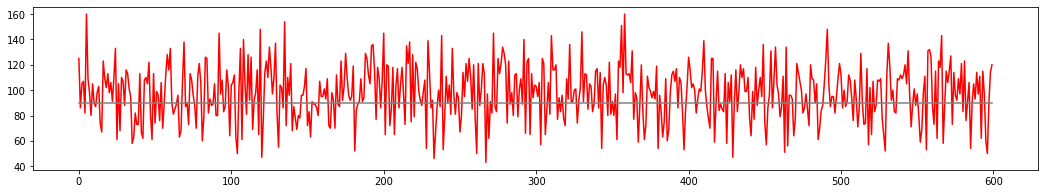

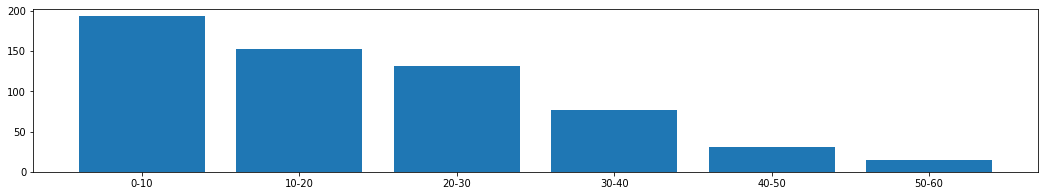

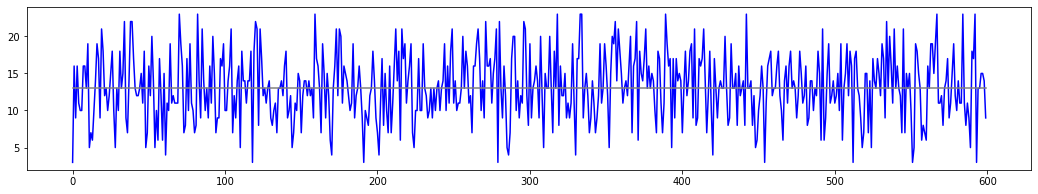

In [18]:
# 1
import matplotlib.pyplot as plt
red_sums=list(map(sum,reds))
red_avgs=list(map(lambda _:red_avg_total,reds))
red_diff=list(map(lambda x:abs(x-red_avg_total), red_sums))
fig,ax=plt.subplots(figsize=(18,3))
ax.plot(red_sums,color='red')
ax.plot(red_avgs, color='gray')
plt.show()


fig,ax=plt.subplots(figsize=(18,3))
diff_count={'0-10':0,'10-20':0,'20-30':0,'30-40':0,'40-50':0,'50-60':0}
diff_count['0-10']=(len(list(filter(lambda x:x>=0 and x<10,red_diff))))
diff_count['10-20']=(len(list(filter(lambda x:x>=10 and x<20,red_diff))))
diff_count['20-30']=(len(list(filter(lambda x:x>=20 and x<30,red_diff))))
diff_count['30-40']=(len(list(filter(lambda x:x>=30 and x<40,red_diff))))
diff_count['40-50']=(len(list(filter(lambda x:x>=40 and x<50,red_diff))))
diff_count['50-60']=(len(list(filter(lambda x:x>=50,red_diff))))

ax.bar(diff_count.keys(),diff_count.values())
plt.show()

blue_sums=list(map(sum,blues))
blue_avgs=list(map(lambda _:blue_avg_total,blues))
fig,ax=plt.subplots(figsize=(18,3))
ax.plot(blue_sums,color='blue')
ax.plot(blue_avgs, color='gray')
plt.show()
# prefer diff=10, 20

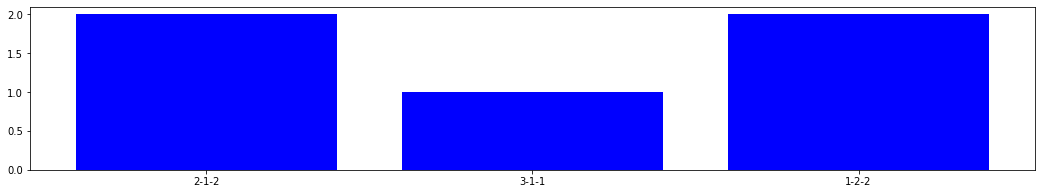

In [10]:
# 2: 3 area
import matplotlib.pyplot as plt
area1=list(range(1,13))
area2=list(range(13,25))
area3=list(range(25,36))
dic_case={}
for red in reds:
  area1_count, area2_count, area3_count=0,0,0
  for boll in red:
    if (boll in area1):
      area1_count+=1
    elif boll in area2:
      area2_count+=1
    elif boll in area3:
      area3_count+=1
  key=f'{area1_count}-{area2_count}-{area3_count}'
  value=dic_case.get(key,0)
  dic_case[key]=value+1

fig,ax=plt.subplots(figsize=(18,3))
ax.bar(dic_case.keys(),dic_case.values(),color='blue')
plt.show()
# prefer: 2-1-2, 2-2-1, 1-2-2, 1-3-1, 3-1-1, 1-1-3


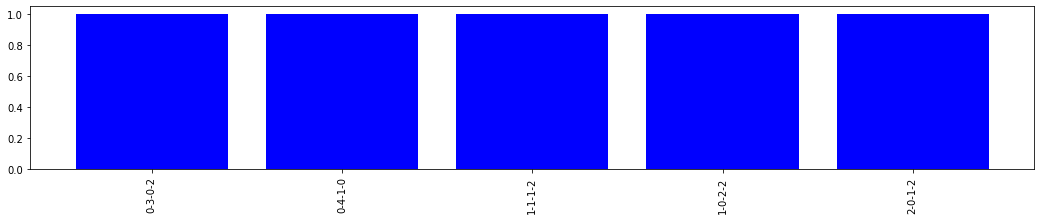

{'0-3-0-2': 1, '0-4-1-0': 1, '1-1-1-2': 1, '1-0-2-2': 1, '2-0-1-2': 1}


In [11]:
# 3: + area, 4 area
import matplotlib.pyplot as plt
area1=[1,2,3,7,8,9,13,14,15]
area2=[4,5,6,10,11,12,16,17,18]
area3=[19,20,21,25,26,27,31,32,33]
area4=[22,23,24,28,29,30,34,35]

dic_case={}
for red in reds:
  area1_count, area2_count, area3_count, area4_count=0,0,0,0
  for boll in red:
    if (boll in area1):
      area1_count+=1
    elif boll in area2:
      area2_count+=1
    elif boll in area3:
      area3_count+=1
    elif boll in area4:
      area4_count+=1
  key=f'{area1_count}-{area2_count}-{area3_count}-{area4_count}'
  value=dic_case.get(key,0)
  dic_case[key]=value+1

fig,ax=plt.subplots(figsize=(18,3))
ax.bar(dic_case.keys(),dic_case.values(),color='blue')
plt.xticks(rotation=90)
plt.show()
print(dic_case)
# prefer: 2-1-1-1, 1-1-2-1, 1-2-1-1, 1-1-1-2, 1-2-2-0


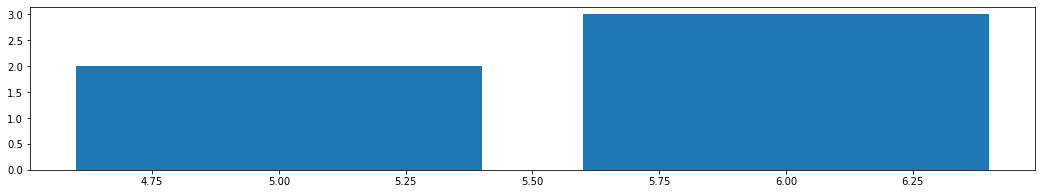

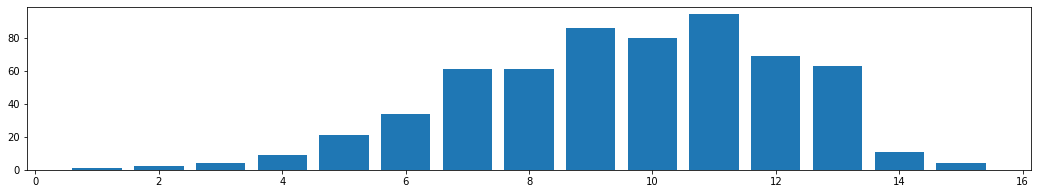

In [12]:
# 5, ac
import matplotlib.pyplot as plt
def get_ac_count(inputs,nums):
  ac_count={}
  for bolls in inputs:
    diffs=set()
    for boll1 in bolls:
      for boll2 in bolls:
        diffs.add(abs(boll1-boll2))
    ac=len(diffs)-1-(nums-1)
    count=ac_count.get(ac,0)
    ac_count[ac]=count+1
  return ac_count

red_ac_count=get_ac_count(reds,5)
all_ac_count=get_ac_count(red_blues,7)

fig,ax=plt.subplots(figsize=(18,3))
ax.bar(red_ac_count.keys(),red_ac_count.values())
plt.show()
fig,ax=plt.subplots(figsize=(18,3))
ax.bar(all_ac_count.keys(),all_ac_count.values())
plt.show()
# red: prefer 6, 5/4
# all: 9/10/11, 7/8/12

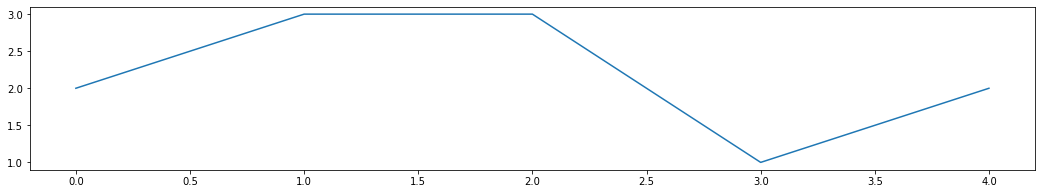

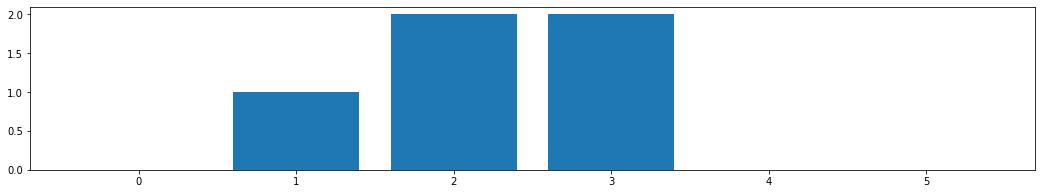

In [13]:
# 6, prime number
import matplotlib.pyplot as plt
primes=[2,3,5,7,11,13,17,19,23,29,31]
prime_count=[]
for red in reds:
  intersec=list(set(primes)&set(red))
  prime_count.append(len(intersec))

fig,ax=plt.subplots(figsize=(18,3))
ax.plot(prime_count)
plt.show()

prime_stat={}
for num in range(0,6):
  count=prime_count.count(num)
  prime_stat[num]=count
fig,ax=plt.subplots(figsize=(18,3))
ax.bar(prime_stat.keys(),prime_stat.values())
plt.show()
# prefer: 1/2, 3/0

[[1, 2], [6, 10], [3, 6], [5, 11], [3, 8], [4, 6], [2, 8], [4, 12], [7, 9], [3, 10]]


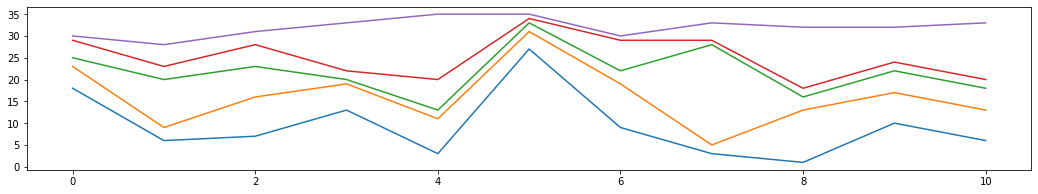

In [ ]:
#7 flow
 
tenRed=reds[:11]
tenBlue=blues[:10]
print(tenBlue)
fig,ax=plt.subplots(figsize=(18,3))
ax.plot(tenRed)
plt.show()



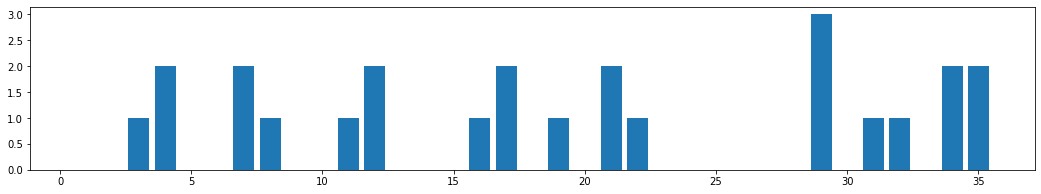

In [14]:
# 8 hot
dic1={}
for index in range(1,36):
  dic1[index]=0
for row in reds[:10]:
  for ball in row:
    dic1[ball]+=1
fig,ax=plt.subplots(figsize=(18,3))
ax.bar(dic1.keys(),dic1.values())
plt.show()

In [34]:
prefers=[9,12,14,16,18,20,22,24,26,28,30,32,24]
result=[]
count=len(prefers)
for i in range(0,count):
  for j in range(i+1,count):
    for k in range(j+1,count):
      for l in range(k+1,count):
        for m in range(l+1,count):
          result.append((prefers[i],prefers[j],prefers[k],prefers[l],prefers[m]))
print(f'total: {len(result)}')

def sum_filter(source, avg=90, diff=10):
  result=list(filter(lambda x:abs(sum(x)-avg)<=diff,source))
  return result

def area3_filter(source):
  area1=list(range(1,13))
  area2=list(range(13,25))
  area3=list(range(25,36))
  pattern=['2-1-2', '2-2-1', '1-2-2', '1-3-1', '3-1-1', '1-1-3']
  filtered=[]
  for row in source:
    area1_count, area2_count, area3_count=0,0,0
    for boll in row:
      if (boll in area1):
        area1_count+=1
      elif boll in area2:
        area2_count+=1
      elif boll in area3:
        area3_count+=1
    key=f'{area1_count}-{area2_count}-{area3_count}'
    if key in pattern:
      filtered.append(row)
  return filtered

def area4_filter(source):
  area1=[1,2,3,7,8,9,13,14,15]
  area2=[4,5,6,10,11,12,16,17,18]
  area3=[19,20,21,25,26,27,31,32,33]
  area4=[22,23,24,28,29,30,34,35]
  pattern=['2-1-1-1', '1-1-2-1', '1-2-1-1', '1-1-1-2', '1-2-2-0']
  filtered=[]
  for row in source:
    area1_count, area2_count, area3_count, area4_count=0,0,0,0
    for boll in row:
      if (boll in area1):
        area1_count+=1
      elif boll in area2:
        area2_count+=1
      elif boll in area3:
        area3_count+=1
      elif boll in area4:
        area4_count+=1
    key=f'{area1_count}-{area2_count}-{area3_count}-{area4_count}'
    if key in pattern:
      filtered.append(row)
  return filtered


filtered=sum_filter(result)
print(len(filtered))
print(f'sum filter: {len(filtered)}')
filtered=area3_filter(filtered)
print(f'area3 filter: {len(filtered)}')
filtered=area4_filter(filtered)
print(filtered[:10])
print(f'area4 filter: {len(filtered)}')

total: 1287
418
sum filter: 418
area3 filter: 302
[(9, 12, 14, 20, 28), (9, 12, 14, 20, 30), (9, 12, 14, 22, 26), (9, 12, 14, 22, 32), (9, 12, 14, 24, 26), (9, 12, 14, 24, 32), (9, 12, 14, 26, 28), (9, 12, 14, 26, 30), (9, 12, 14, 26, 24), (9, 12, 14, 28, 32)]
area4 filter: 160
